In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet
import seaborn as sns
import collections
import math

In [6]:
with open('ID_data_mass_18122012.csv', 'rb') as f:
    result = chardet.detect(f.read())
df = pd.read_csv('ID_data_mass_18122012.csv', sep=';', encoding=result['encoding'])

# use . instead of , in float values 
df = df.apply(lambda x: x.str.replace(',', '.'))
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,осредненные параметры,Unnamed: 5,Unnamed: 6,На конец режима,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Стандартные условия,Unnamed: 15,Unnamed: 16,Unnamed: 17,Линейные условия,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,NaN,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст,Рзаб,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ
1,№,дд.мм.гггг,м,мм,бара,бара,бара,бар,бар,бар,С,С,С,С,1000 м3/сут,м3/сут,м3/сут,1000 м3/сут,м3/сут,м3/сут,м3/сут,м,МПа,МПа,МПа,атм,бар,кг/м3,кг/м3,кг/м3,б/р,кг/с,г/м3,т/тыс.м3
2,804,05.06.08,3576.30,7.94,249.60,370.10,101.80,249.00,359.60,101.80,53.00,31.70,103.20,32.50,214.70,83.60,0.40,231.25,1610.37,131.30,0.40,56.80,45.25,56.50,-,93.60,92.38,0.8060,801.0,1000.0,0.6694,2.78,311.91,NaN
3,804,06.06.08,3576.30,9.53,233.50,364.60,101.30,231.00,338.10,102.40,58.80,37.60,103.00,38.60,290.59,104.70,1.40,309.00,2310.23,158.50,1.40,56.80,45.25,56.50,-,92.90,91.69,0.8060,801.0,1000.0,0.6694,3.70,288.60,NaN
4,804,07.06.08,3576.30,11.11,213.40,357.10,101.60,211.00,314.80,100.60,63.60,42.80,102.60,43.40,368.04,114.30,1.90,388.11,3039.49,172.30,1.90,56.80,45.25,56.50,-,91.40,90.20,0.8060,801.0,1000.0,0.6694,4.52,248.79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,22505,27.09.09,3678.00,14.29,157.00,249.08,96.47,153.00,233.50,100.06,56.70,47.60,104.50,47.72,455.60,89.40,1.70,471.01,4302.00,135.90,1.70,46.74,36.96,60.90,60.80,87.30,86.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,22505,09.04.10,3679.50,7.94,211.90,289.39,91.13,208.00,289.60,91.30,47.00,24.40,104.90,24.84,188.43,61.47,1.12,200.87,1550.00,92.40,1.10,46.74,38.65,64.10,61.30,88.20,87.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,22505,14.04.10,3679.50,9.53,204.00,282.87,91.17,201.00,275.30,91.62,48.90,26.70,104.88,31.58,261.04,72.91,4.75,273.71,2265.00,108.90,4.80,46.74,38.65,64.10,61.30,88.50,87.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,22505,17.04.10,3679.50,11.11,187.50,267.48,91.53,184.00,255.00,89.51,53.50,33.30,104.69,37.48,323.37,82.49,6.28,337.68,2918.00,122.70,6.30,46.74,38.65,64.10,61.30,89.80,88.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Переименоваем первые колонки 
headers = ['Номер', 'Дата']
headers += df.values[0, 2:].tolist()
headers

['Номер',
 'Дата',
 'Глубина манометра',
 'Dшт',
 'Руст',
 'Рзаб',
 'Pлин',
 'Руст',
 'Рзаб',
 'Рлин',
 'Туст',
 'Тна шлейфе',
 'Тзаб',
 'Tлин',
 'Дебит газа',
 'Дебит ст. конд.',
 'Дебит воды',
 'Дебит смеси',
 'Дебит гааз',
 'Дебит кон нестабильный',
 'Дебит воды',
 'Нэф',
 'Рпл. Тек (послед точка на КВД)',
 'Рпл. Тек (Расчет по КВД)',
 'Рпл. Тек (Карноухов)',
 'Pсб',
 'Pсб',
 'Ro_g',
 'Ro_c',
 'Ro_w',
 'Удельная плотность газа ',
 'G_total',
 'КГФ',
 'КГФ']

In [8]:
# формируем массив с названиями колонок
dict = {}

for i, header in enumerate(headers):
    if header not in dict:
        dict[header] = 1
    else:
        dict[header] += 1
        headers[i] = headers[i] + '_' + str(dict[headers[i]])

headers

['Номер',
 'Дата',
 'Глубина манометра',
 'Dшт',
 'Руст',
 'Рзаб',
 'Pлин',
 'Руст_2',
 'Рзаб_2',
 'Рлин',
 'Туст',
 'Тна шлейфе',
 'Тзаб',
 'Tлин',
 'Дебит газа',
 'Дебит ст. конд.',
 'Дебит воды',
 'Дебит смеси',
 'Дебит гааз',
 'Дебит кон нестабильный',
 'Дебит воды_2',
 'Нэф',
 'Рпл. Тек (послед точка на КВД)',
 'Рпл. Тек (Расчет по КВД)',
 'Рпл. Тек (Карноухов)',
 'Pсб',
 'Pсб_2',
 'Ro_g',
 'Ro_c',
 'Ro_w',
 'Удельная плотность газа ',
 'G_total',
 'КГФ',
 'КГФ_2']

In [9]:
# удаляем первые строки с названиями и единицами измерения
df.drop([0, 1], inplace=True)
df.columns = headers
df = df.reset_index(drop=True)
df

,Номер,Дата,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст_2,Рзаб_2,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды_2,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб_2,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ_2
0,804,05.06.08,3576.30,7.94,249.60,370.10,101.80,249.00,359.60,101.80,53.00,31.70,103.20,32.50,214.70,83.60,0.40,231.25,1610.37,131.30,0.40,56.80,45.25,56.50,-,93.60,92.38,0.8060,801.0,1000.0,0.6694,2.78,311.91,NaN
1,804,06.06.08,3576.30,9.53,233.50,364.60,101.30,231.00,338.10,102.40,58.80,37.60,103.00,38.60,290.59,104.70,1.40,309.00,2310.23,158.50,1.40,56.80,45.25,56.50,-,92.90,91.69,0.8060,801.0,1000.0,0.6694,3.70,288.60,NaN
2,804,07.06.08,3576.30,11.11,213.40,357.10,101.60,211.00,314.80,100.60,63.60,42.80,102.60,43.40,368.04,114.30,1.90,388.11,3039.49,172.30,1.90,56.80,45.25,56.50,-,91.40,90.20,0.8060,801.0,1000.0,0.6694,4.52,248.79,NaN
3,804,08.06.08,3576.30,12.70,191.60,347.40,98.40,187.00,291.50,99.00,64.70,46.20,102.00,46.10,434.66,121.30,3.30,455.21,3824.08,181.50,3.30,56.80,45.25,56.50,-,89.20,88.03,0.8060,801.0,1000.0,0.6694,5.22,223.56,NaN
4,804,09.06.08,3576.30,14.29,171.90,337.70,99.20,169.00,270.30,99.50,64.00,49.40,104.40,49.90,483.28,129.80,4.60,504.59,4299.10,190.60,4.70,56.80,45.25,56.50,-,89.70,88.53,0.8060,801.0,1000.0,0.6694,5.77,215.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,22505,27.09.09,3678.00,14.29,157.00,249.08,96.47,153.00,233.50,100.06,56.70,47.60,104.50,47.72,455.60,89.40,1.70,471.01,4302.00,135.90,1.70,46.74,36.96,60.90,60.80,87.30,86.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,22505,09.04.10,3679.50,7.94,211.90,289.39,91.13,208.00,289.60,91.30,47.00,24.40,104.90,24.84,188.43,61.47,1.12,200.87,1550.00,92.40,1.10,46.74,38.65,64.10,61.30,88.20,87.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,22505,14.04.10,3679.50,9.53,204.00,282.87,91.17,201.00,275.30,91.62,48.90,26.70,104.88,31.58,261.04,72.91,4.75,273.71,2265.00,108.90,4.80,46.74,38.65,64.10,61.30,88.50,87.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,22505,17.04.10,3679.50,11.11,187.50,267.48,91.53,184.00,255.00,89.51,53.50,33.30,104.69,37.48,323.37,82.49,6.28,337.68,2918.00,122.70,6.30,46.74,38.65,64.10,61.30,89.80,88.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Заполняем пропуски NaN
for i in df.columns[2:]:
    df[i] = pd.to_numeric(df[i], errors='coerce')

# Удаляем строки где обе целевые пременные NaN
for i in range(len(df)):
    if (pd.isnull(df['КГФ'][i])) and (pd.notnull(df['КГФ_2'][i])):
        df['КГФ'][i] = df['КГФ_2'][i] * 1000

# Удаляем вторую колонку с КГФ
df.drop('КГФ_2', axis=1, inplace=True)
df.dropna(how="all", subset=['КГФ', 'G_total'], inplace=True)
df = df.reset_index(drop=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Номер,Дата,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст_2,Рзаб_2,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды_2,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб_2,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,804,05.06.08,3576.3,7.94,249.60,370.1,101.80,249.0,359.6,101.80,53.0,31.7,103.20,32.50,214.70,83.6,0.40,231.25,1610.37,131.3,0.4,56.80,45.25,56.5,NaN,93.6,92.38,0.806,801.0,1000.0,0.6694,2.78,311.91
1,804,06.06.08,3576.3,9.53,233.50,364.6,101.30,231.0,338.1,102.40,58.8,37.6,103.00,38.60,290.59,104.7,1.40,309.00,2310.23,158.5,1.4,56.80,45.25,56.5,NaN,92.9,91.69,0.806,801.0,1000.0,0.6694,3.70,288.60
2,804,07.06.08,3576.3,11.11,213.40,357.1,101.60,211.0,314.8,100.60,63.6,42.8,102.60,43.40,368.04,114.3,1.90,388.11,3039.49,172.3,1.9,56.80,45.25,56.5,NaN,91.4,90.20,0.806,801.0,1000.0,0.6694,4.52,248.79
3,804,08.06.08,3576.3,12.70,191.60,347.4,98.40,187.0,291.5,99.00,64.7,46.2,102.00,46.10,434.66,121.3,3.30,455.21,3824.08,181.5,3.3,56.80,45.25,56.5,NaN,89.2,88.03,0.806,801.0,1000.0,0.6694,5.22,223.56
4,804,09.06.08,3576.3,14.29,171.90,337.7,99.20,169.0,270.3,99.50,64.0,49.4,104.40,49.90,483.28,129.8,4.60,504.59,4299.10,190.6,4.7,56.80,45.25,56.5,NaN,89.7,88.53,0.806,801.0,1000.0,0.6694,5.77,215.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,22503,28.01.09,3284.0,12.70,215.00,307.8,98.60,215.0,308.1,97.20,65.0,45.8,104.78,46.30,479.09,93.5,4.70,495.63,4165.00,156.8,4.8,44.50,35.28,40.5,41.6,94.4,93.17,NaN,782.0,NaN,0.6600,NaN,153.00
89,22503,01.02.09,3284.0,14.29,198.00,293.6,98.50,197.0,293.9,98.40,66.9,49.8,104.63,50.50,568.50,106.6,6.40,587.36,5113.00,174.3,6.5,44.50,35.28,40.5,41.6,94.0,92.77,NaN,782.0,NaN,0.6600,NaN,147.00
90,22503,16.08.10,3288.6,7.94,231.23,309.1,92.60,230.0,307.1,92.70,51.0,NaN,104.40,28.10,215.80,50.5,0.45,224.86,1759.00,84.7,0.4,48.37,33.21,NaN,NaN,89.9,88.72,NaN,779.6,NaN,0.6700,NaN,182.00
91,22503,20.08.10,3288.6,11.11,217.20,293.9,93.10,215.0,293.9,93.30,60.0,NaN,104.60,41.30,387.68,72.0,1.50,403.75,3454.00,123.0,1.6,48.37,33.21,NaN,NaN,90.8,89.61,NaN,779.6,NaN,0.6700,NaN,145.00


In [11]:
# save
df.to_csv('cleanData.csv', sep=";", encoding='cp1251')

In [12]:
def dist_properties(df):
    index = df.columns[2:]
    d = {'Кол-во': [], '% пропусков': [], 'Минимум': [], 'Максимум': [], 'Среднее': [], 'Мощность': [],
         '% уникальных': [], 'Q_1': [], 'Q_2': [], 'Q_3': [],
         'Cреднеквадратическое отклонение': [], 'IQR Интерквантильный размах': []}
    for h in df.columns[2:]:
        d['Кол-во'].append(df[h].count())
        d['% пропусков'].append(df[h].isna().sum() / len(df) * 100)
        d['Минимум'].append(df[h].min())
        d['Максимум'].append(df[h].max())
        d['Среднее'].append(df[h].mean())
        d['Мощность'].append(df[h].nunique())
        d['% уникальных'].append(df[h].nunique() / df[h].count() * 100)
        d['Q_1'].append(df[h].quantile(0.25))
        d['Q_2'].append(df[h].median())
        d['Q_3'].append(df[h].quantile(0.75))
        d['Cреднеквадратическое отклонение'].append(df[h].std())
        d['IQR Интерквантильный размах'].append(df[h].quantile(0.75) - df[h].quantile(0.25))

    return pd.DataFrame(d, index)

In [13]:
stats = dist_properties(df)
stats

,Кол-во,% пропусков,Минимум,Максимум,Среднее,Мощность,% уникальных,Q_1,Q_2,Q_3,Cреднеквадратическое отклонение,IQR Интерквантильный размах
Глубина манометра,90,3.225806,3276.0000,3670.0000,3524.086667,20,22.222222,3427.6250,3579.000,3652.2500,144.474862,224.6250
Dшт,93,0.000000,6.3500,15.8800,10.951183,10,10.752688,9.5300,11.110,12.7000,2.423172,3.1700
Руст,93,0.000000,138.1600,337.1100,228.293871,87,93.548387,201.6400,229.890,252.0000,41.897056,50.3600
Рзаб,90,3.225806,174.0000,458.6000,331.762222,88,97.777778,297.7975,337.790,364.1500,56.481226,66.3525
Pлин,93,0.000000,73.3100,121.6800,99.861075,90,96.774194,95.9500,100.800,103.8700,7.300709,7.9200
Руст_2,93,0.000000,136.0000,333.0000,227.644624,73,78.494624,200.0000,228.000,252.0000,41.757260,52.0000
Рзаб_2,90,3.225806,174.0000,458.5000,330.334444,89,98.888889,294.6250,334.250,362.1500,56.357493,67.5250
Рлин,93,0.000000,40.7400,123.6200,98.005376,87,93.548387,95.3400,100.260,104.0000,12.425643,8.6600
Туст,93,0.000000,24.2000,75.0000,56.172043,51,54.838710,50.3000,58.000,64.0000,11.250781,13.7000
Тна шлейфе,60,35.483871,14.0000,110.2000,43.091667,57,95.000000,33.3000,38.700,46.3750,19.602337,13.0750


Отсеиваем где больше 60% пропусков или мощность 1

In [14]:
to_remove = []

cont_index = []

for i in stats.index:
    if stats['% пропусков'][i] > 60 and i != 'G_total':
        to_remove.append(i)
        continue
    if stats['Мощность'][i] == 1:
        to_remove.append[i]
    else:
        cont_index.append(i)

to_remove

['Ro_g', 'Ro_w']

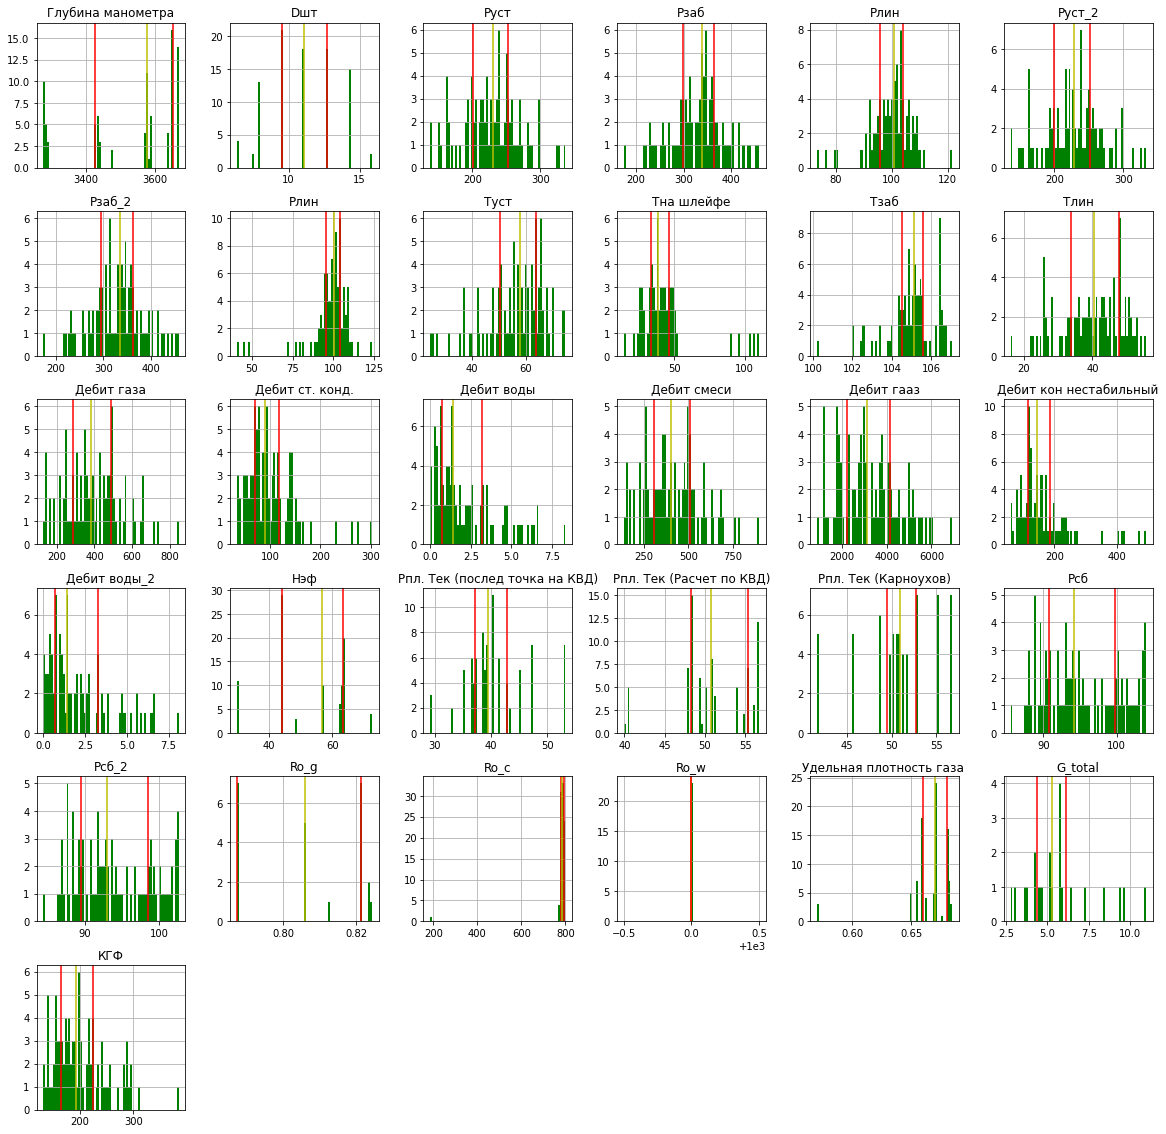

In [15]:
ax = df.hist(bins=70, figsize=(20, 20), color='g')

idx = 0

for ax_i in ax:
    for x in ax_i:
        if idx < len(df.columns[2:]):
            x.axvline(x=stats['Q_1'][idx], ymin=0, ymax=1, color='r')
            x.axvline(x=stats['Q_2'][idx], ymin=0, ymax=1, color='y')
            x.axvline(x=stats['Q_3'][idx], ymin=0, ymax=1, color='r')
            idx+=1

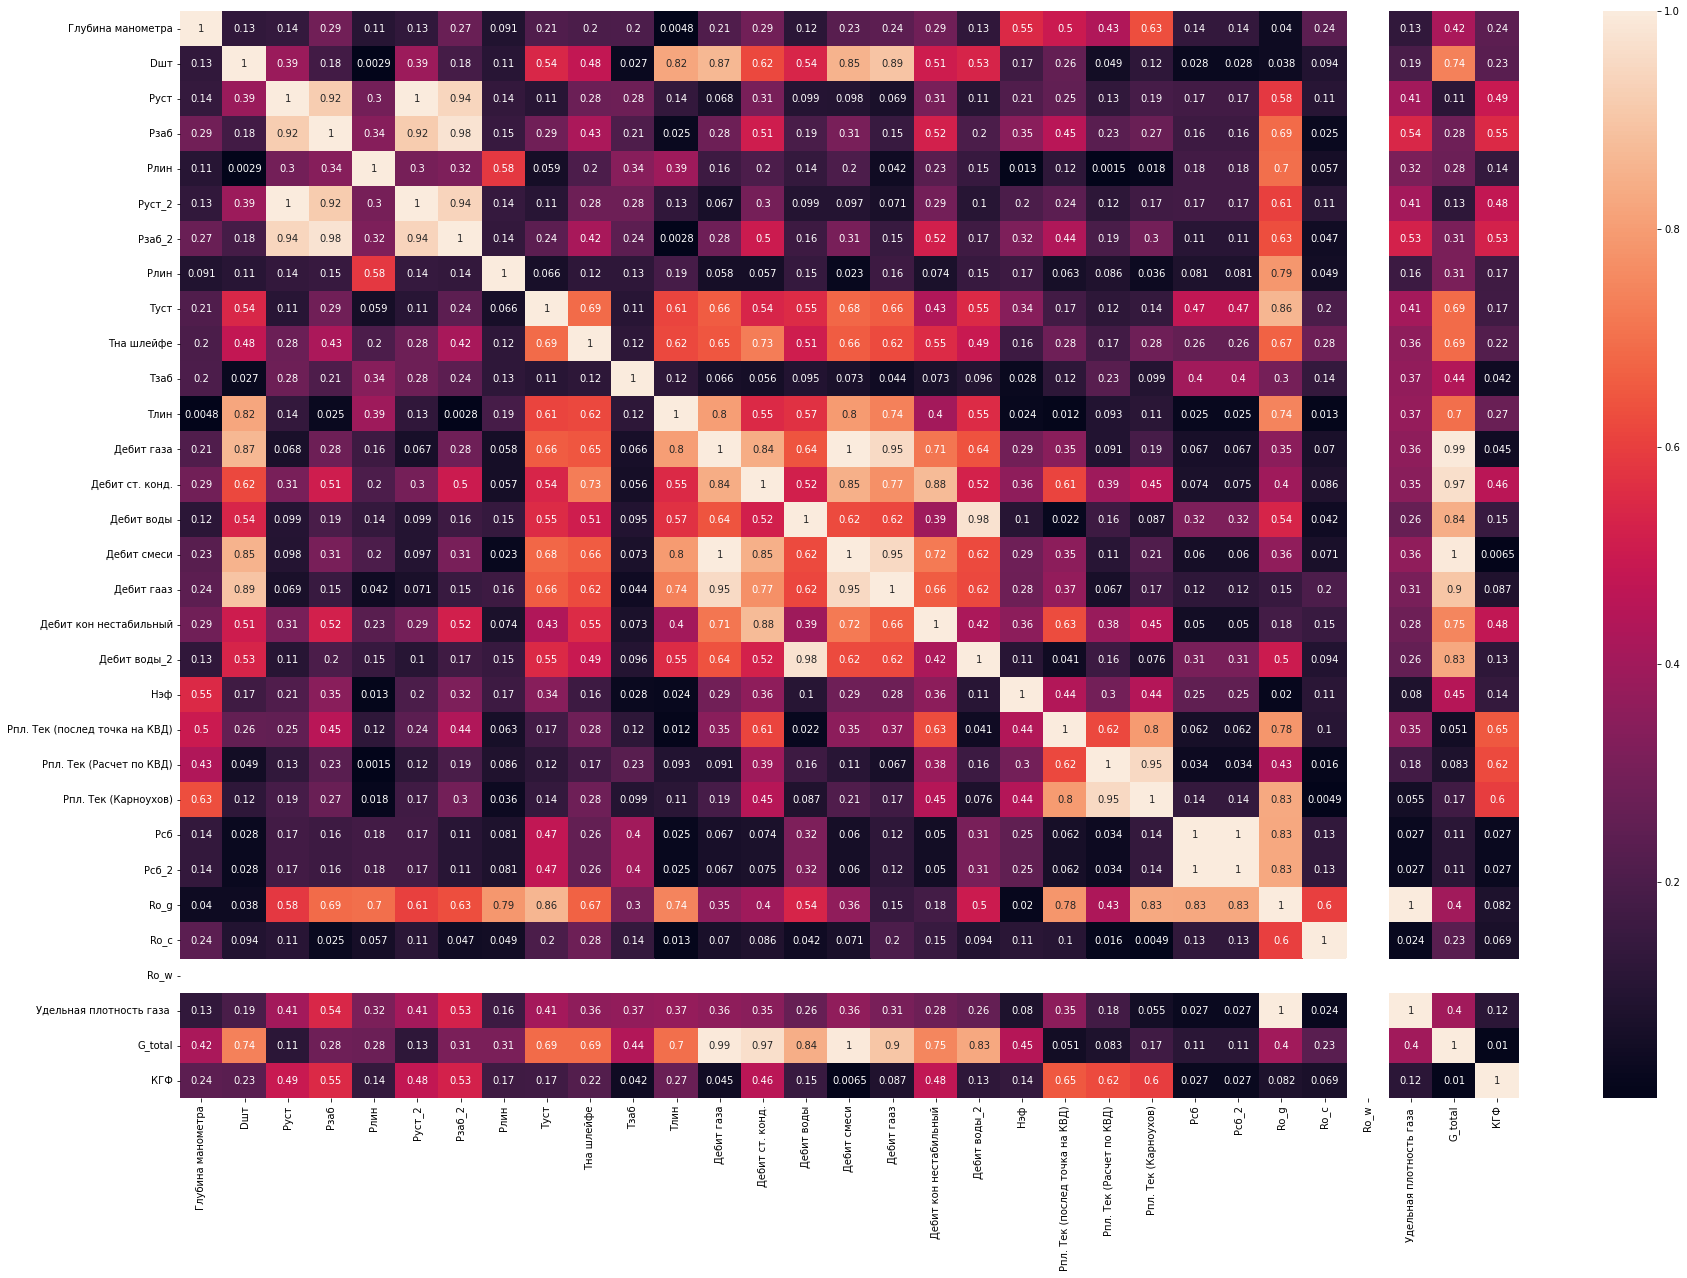

In [16]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(abs(corr), xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [17]:
df.drop(to_remove, axis=1, inplace=True)

# Break КГФ on categories:

In [18]:
N = df.shape[0]
n = int(np.log2(N)) + 1

KGF_categories = pd.cut(df["КГФ"], n, labels=np.arange(n))
KGF_bins = pd.cut(df["КГФ"], n, labels=np.arange(n), retbins=True)[1]
df['КГФ'] = KGF_categories
print(KGF_bins)
df

[130.74558    167.34571429 203.69142857 240.03714286 276.38285714
 312.72857143 349.07428571 385.42      ]


,Номер,Дата,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст_2,Рзаб_2,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды_2,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб_2,Ro_c,Удельная плотность газа,G_total,КГФ
0,804,05.06.08,3576.3,7.94,249.60,370.1,101.80,249.0,359.6,101.80,53.0,31.7,103.20,32.50,214.70,83.6,0.40,231.25,1610.37,131.3,0.4,56.80,45.25,56.5,NaN,93.6,92.38,801.0,0.6694,2.78,4
1,804,06.06.08,3576.3,9.53,233.50,364.6,101.30,231.0,338.1,102.40,58.8,37.6,103.00,38.60,290.59,104.7,1.40,309.00,2310.23,158.5,1.4,56.80,45.25,56.5,NaN,92.9,91.69,801.0,0.6694,3.70,4
2,804,07.06.08,3576.3,11.11,213.40,357.1,101.60,211.0,314.8,100.60,63.6,42.8,102.60,43.40,368.04,114.3,1.90,388.11,3039.49,172.3,1.9,56.80,45.25,56.5,NaN,91.4,90.20,801.0,0.6694,4.52,3
3,804,08.06.08,3576.3,12.70,191.60,347.4,98.40,187.0,291.5,99.00,64.7,46.2,102.00,46.10,434.66,121.3,3.30,455.21,3824.08,181.5,3.3,56.80,45.25,56.5,NaN,89.2,88.03,801.0,0.6694,5.22,2
4,804,09.06.08,3576.3,14.29,171.90,337.7,99.20,169.0,270.3,99.50,64.0,49.4,104.40,49.90,483.28,129.8,4.60,504.59,4299.10,190.6,4.7,56.80,45.25,56.5,NaN,89.7,88.53,801.0,0.6694,5.77,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,22503,28.01.09,3284.0,12.70,215.00,307.8,98.60,215.0,308.1,97.20,65.0,45.8,104.78,46.30,479.09,93.5,4.70,495.63,4165.00,156.8,4.8,44.50,35.28,40.5,41.6,94.4,93.17,782.0,0.6600,NaN,0
89,22503,01.02.09,3284.0,14.29,198.00,293.6,98.50,197.0,293.9,98.40,66.9,49.8,104.63,50.50,568.50,106.6,6.40,587.36,5113.00,174.3,6.5,44.50,35.28,40.5,41.6,94.0,92.77,782.0,0.6600,NaN,0
90,22503,16.08.10,3288.6,7.94,231.23,309.1,92.60,230.0,307.1,92.70,51.0,NaN,104.40,28.10,215.80,50.5,0.45,224.86,1759.00,84.7,0.4,48.37,33.21,NaN,NaN,89.9,88.72,779.6,0.6700,NaN,1
91,22503,20.08.10,3288.6,11.11,217.20,293.9,93.10,215.0,293.9,93.30,60.0,NaN,104.60,41.30,387.68,72.0,1.50,403.75,3454.00,123.0,1.6,48.37,33.21,NaN,NaN,90.8,89.61,779.6,0.6700,NaN,0


In [151]:
# categories = df.loc[:, df.columns == ['КГФ', 'G_total']]
categories = df[['КГФ', 'G_total']].copy(deep=True)
categories.drop_duplicates(inplace=True)
categories_tup = [tuple(x) for x in categories.values]

categories_tup

[(4.0, 2.78),
 (4.0, 3.7),
 (3.0, 4.52),
 (2.0, 5.22),
 (2.0, 5.77),
 (3.0, 3.08),
 (1.0, nan),
 (0.0, nan),
 (2.0, nan),
 (6.0, 4.23),
 (4.0, 4.71),
 (3.0, 5.73),
 (2.0, 5.78),
 (2.0, 5.76),
 (1.0, 5.25),
 (3.0, 4.25),
 (4.0, 3.72),
 (4.0, 5.17),
 (4.0, 8.4),
 (4.0, 9.64),
 (4.0, 10.93),
 (4.0, 9.33),
 (4.0, 6.42),
 (3.0, 4.59),
 (3.0, 5.83),
 (2.0, 7.28),
 (3.0, nan)]

In [230]:
def entropy(list): # entropy for list = [ value, ..., value, sum ]
    # print(list)
    sum = list[-2]
    entr = 0
    for v in list:
        if not pd.isna(v) and v != 0:
            entr += (-1) * v / sum * math.log2(v / sum)
            # print(f"entr += (-1) * {v} / {sum} * {math.log2(v / sum)}")

    return entr

In [220]:
def conditional_entropy(table, total_sum):
    cond_entr = 0

    for list in table:
        sum = list[-2]
        entr = list[-1]
        cond_entr += sum / total_sum * entr
        # print(f"ce += {sum} / {total_sum} * {entr}")
    
    return cond_entr

In [231]:
def split_info(table, total_sum):
    split_inf = 0

    for list in table:
        sum = list[-2]
        if sum != 0:
          split_inf += (-1) * sum / total_sum * math.log2(sum / total_sum)
          # print(f"ce += {sum} / {total_sum} * {math.log2(sum / total_sum)}")

    return split_inf

In [245]:
def compute_gain_ratio(column_name: str):
  if column_name not in df.columns:
    print('This column name is not in dataframe')
    return 
  counter_KGF = collections.Counter(df['КГФ'])
  new_column = [tuple([column_name, ''])] + categories_tup + [tuple(['Count of each group', ''])] + [tuple(['Entropy', ''])]
  cat_index = pd.MultiIndex.from_tuples(new_column)

  depth_table = pd.DataFrame(columns=cat_index)
  depth_table[column_name] = df.drop_duplicates(subset=[column_name])[column_name].copy(deep=True)
  depth_table.reset_index(inplace=True)
  depth_table.drop(columns=['index'], inplace=True)
  for j, val in enumerate(depth_table[column_name]):
    for i in df.index:
        if df[column_name][i] == val:
            current_KGF = df['КГФ'].values[i]
            current_G = df['G_total'].values[i]
            # idx = '(' + str(current_KGF) + ', ' + str(current_G) + ')'
            depth_table[current_KGF, current_G].values[j] = 1 if pd.isna(depth_table[current_KGF, current_G].values[j]) else depth_table[current_KGF, current_G].values[j] + 1

  depth_table['Count of each group'] = depth_table.iloc[:,1:].sum(axis=1)

  for i, _ in enumerate(depth_table[column_name]):
      depth_table['Entropy', ''].values[i] = entropy(depth_table.iloc[:,1:].values[i])

  overall_entr = entropy(depth_table.sum()[1:].values)
  cond_entr = conditional_entropy(depth_table.iloc[:,1:].values, depth_table.sum()[1:].values[-2])
  split = split_info(depth_table.iloc[:,1:].values, depth_table.sum()[1:].values[-2])
  gain_ratio = (overall_entr - cond_entr) / split
  # print(f"Overall Entropy = {overall_entr}")
  # print(f"Cond Entropy = {cond_entr}")
  # print(f"Split Info = {split}")
  print(f"Gain ratio = {(overall_entr - cond_entr) / split}")
  return gain_ratio


In [308]:
res = []
for col in df.columns[2:-2]:
  res.append(compute_gain_ratio(col))

#for plot
res = sorted(res)

gain_ratios = pd.DataFrame(res, index=df.columns[2:-2].values, columns=["Gain Ratio"])

gain_ratios

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Gain ratio = 0.5448464792044144
Gain ratio = 0.5641899656628284
Gain ratio = 0.5070673935490562
Gain ratio = 0.48979596269240827
Gain ratio = 0.5031926310201856
Gain ratio = 0.5409706233915108
Gain ratio = 0.4881135862263785
Gain ratio = 0.5123880851436148
Gain ratio = 0.5252109358252126
Gain ratio = 0.5583020943366367
Gain ratio = 0.5373621211080543
Gain ratio = 0.5078426265931004
Gain ratio = 0.4865888160614617
Gain ratio = 0.4956829533098927
Gain ratio = 0.5352298498949175
Gain ratio = 0.48303547696912075
Gain ratio = 0.49568295330989276
Gain ratio = 0.506155839021226
Gain ratio = 0.5189020487499412
Gain ratio = 0.5126163232929715
Gain ratio = 0.5592332163105818
Gain ratio = 0.5955609683702504
Gain ratio = 0.600257294522779
Gain ratio = 0.5394137012257516
Gain ratio = 0.5394137012257516
Gain ratio = 0.5923794167208463
Gain ratio = 0.6685391272946022


,Gain Ratio
Глубина манометра,0.483035
Dшт,0.486589
Руст,0.488114
Рзаб,0.489796
Pлин,0.495683
Руст_2,0.495683
Рзаб_2,0.503193
Рлин,0.506156
Туст,0.507067
Тна шлейфе,0.507843


In [309]:
# gain_ratios.plot(kind='bar', figsize=(10,10), title="Gain ratio hist", colormap='summer')

import plotly.express as px
gain_ratios = gain_ratios.sort_values('Gain Ratio')
fig = px.bar(gain_ratios, color=res, title="Gain ratio histogram")
fig.show()

In [232]:
counter_KGF = collections.Counter(df['КГФ'])
new_column = [tuple(['Глубина манометра', ''])] + categories_tup + [tuple(['Count of each group', ''])] + [tuple(['Entropy', ''])]
# categories_tup += [tuple(['Entropy', ''])]
print(new_column)

# columns_new = ['Глубина манометра']
# columns_new += ([*counter_KGF.keys()])
cat_index = pd.MultiIndex.from_tuples(new_column)
# columns_new += categories_tup
# columns_new += pd.MultiIndex(['Count of each group', 'Entropy'])

# print(columns_new)

depth_table = pd.DataFrame(columns=cat_index)
depth_table['Глубина манометра'] = df.drop_duplicates(subset=['Глубина манометра'])['Глубина манометра'].copy(deep=True)
# depth_table.dropna(subset=['Глубина манометра'], inplace=True)
depth_table.reset_index(inplace=True)
depth_table.drop(columns=['index'], inplace=True)
depth_table

[('Глубина манометра', ''), (4.0, 2.78), (4.0, 3.7), (3.0, 4.52), (2.0, 5.22), (2.0, 5.77), (3.0, 3.08), (1.0, nan), (0.0, nan), (2.0, nan), (6.0, 4.23), (4.0, 4.71), (3.0, 5.73), (2.0, 5.78), (2.0, 5.76), (1.0, 5.25), (3.0, 4.25), (4.0, 3.72), (4.0, 5.17), (4.0, 8.4), (4.0, 9.64), (4.0, 10.93), (4.0, 9.33), (4.0, 6.42), (3.0, 4.59), (3.0, 5.83), (2.0, 7.28), (3.0, nan), ('Count of each group', ''), ('Entropy', '')]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Глубина манометра  4.0       3.0  ...  2.0  3.0 Count of each group Entropy
                     2.78  3.7 4.52  ... 7.28  NaN                            
0             3576.3  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
1             3667.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
2             3579.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
3             3582.5  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
4             3653.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
5             3650.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
6                NaN  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
7             3572.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
8             3588.5  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
9             3478.5  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
10            3640.5  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
11            3670.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
12            3668.5  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
13            3424.5  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
14            3437.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
15            3440.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
16            3277.8  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
17            3276.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
18            3284.0  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
19            3288.6  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN
20            3289.8  NaN  NaN  NaN  ...  NaN  NaN                 NaN     NaN

[21 rows x 30 columns]

In [233]:
for j, val in enumerate(depth_table['Глубина манометра']):
    for i in df.index:
        if df['Глубина манометра'][i] == val:
            current_KGF = df['КГФ'].values[i]
            current_G = df['G_total'].values[i]
            # idx = '(' + str(current_KGF) + ', ' + str(current_G) + ')'
            depth_table[current_KGF, current_G].values[j] = 1 if pd.isna(depth_table[current_KGF, current_G].values[j]) else depth_table[current_KGF, current_G].values[j] + 1

depth_table['Count of each group'] = depth_table.iloc[:,1:].sum(axis=1)
# depth_table['Count of each group'] = depth_table.loc[:, depth_table.columns!='Глубина манометра'].sum(skipna=True, axis=1)

for i, _ in enumerate(depth_table['Глубина манометра']):
    depth_table['Entropy', ''].values[i] = entropy(depth_table.iloc[:,1:].values[i])

# print(depth_table.sum()[1:-1].values)

overall_entr = entropy(depth_table.sum()[1:].values)
cond_entr = conditional_entropy(depth_table.iloc[:,1:].values, depth_table.sum()[1:].values[-2])
split = split_info(depth_table.iloc[:,1:].values, depth_table.sum()[1:].values[-2])

print(f"Overall Entropy = {overall_entr}")
print(f"Cond Entropy = {cond_entr}")
print(f"Split Info = {split}")
print(f"Gain ratio = {(overall_entr - cond_entr) / split}")


depth_table

Overall Entropy = 3.6467671355267632
Cond Entropy = 1.4054852705117609
Split Info = 4.11360254779975
Gain ratio = 0.5448464792044144


Глубина манометра  4.0       3.0  ...  2.0  3.0 Count of each group   Entropy
                     2.78  3.7 4.52  ... 7.28  NaN                              
0             3576.3    1    1    1  ...  NaN  NaN                 6.0  2.584963
1             3667.0  NaN  NaN  NaN  ...  NaN  NaN                 9.0  0.918296
2             3579.0  NaN  NaN  NaN  ...  NaN  NaN                 5.0  1.521928
3             3582.5  NaN  NaN  NaN  ...  NaN  NaN                 1.0       0.0
4             3653.0  NaN  NaN  NaN  ...  NaN  NaN                 9.0  3.169925
5             3650.0  NaN  NaN  NaN  ...  NaN  NaN                 7.0  2.807355
6                NaN  NaN  NaN  NaN  ...  NaN  NaN                 0.0         0
7             3572.0  NaN  NaN  NaN  ...  NaN    2                 4.0       1.0
8             3588.5  NaN  NaN  NaN  ...  NaN  NaN                 6.0       1.0
9             3478.5  NaN  NaN  NaN  ...  NaN  NaN                 2.0       0.0
10            3640.5  NaN  NaN  NaN  ...  NaN  NaN                 4.0  0.811278
11            3670.0  NaN  NaN  NaN  ...  NaN  NaN                 1.0       0.0
12            3668.5  NaN  NaN  NaN  ...  NaN  NaN                 4.0       0.0
13            3424.5  NaN  NaN  NaN  ...  NaN    1                 5.0  1.921928
14            3437.0  NaN  NaN  NaN  ...  NaN  NaN                 6.0  1.459148
15            3440.0  NaN  NaN  NaN  ...  NaN  NaN                 3.0       0.0
16            3277.8  NaN  NaN  NaN  ...  NaN  NaN                 5.0  0.721928
17            3276.0  NaN  NaN  NaN  ...  NaN  NaN                 5.0  0.970951
18            3284.0  NaN  NaN  NaN  ...  NaN  NaN                 5.0  0.970951
19            3288.6  NaN  NaN  NaN  ...  NaN  NaN                 2.0       1.0
20            3289.8  NaN  NaN  NaN  ...  NaN  NaN                 1.0       0.0

[21 rows x 30 columns]